In [125]:
import gpuRIR
import os
import random
import numpy as np
import math
import pandas as pd
import math
import matplotlib.pyplot as plt

room size: [8.431835200744292, 6.654435036826237, 4.4182817578542615]
pos_rcv: [[4.1759176  3.32721752 2.20914088]
 [4.2159176  3.32721752 2.20914088]
 [4.2559176  3.32721752 2.20914088]]
src_dist: 1.555725038523296
pos1_angle: 83.0 pos2_angle: 79.0
pos_src1: [4.405512789335928, 4.871346418411463, 2.2091408789271307]
pos_src2: [4.512763932054913, 4.85435950619775, 2.2091408789271307]
t60: 0.540536380982819


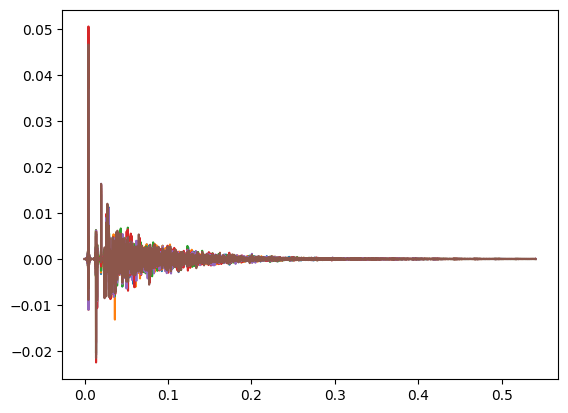

In [180]:
# fixed src, fixed rcv
fs = 16000
nb_src = 2
nb_rcv = 3

# Room
x = random.uniform(6.0,10.0)
y = random.uniform(6.0, 8.0)
z = random.uniform(2.5,6.0)
room_sz = [x, y, z]  

# microphone distance of the fixed-array
distance = 0.04

# receivers
x_rcv, y_rcv, z_rcv = x/2, y/2, z/2
pos_rcv = np.array([[x_rcv-distance, y_rcv, z_rcv ], [x_rcv, y_rcv, z_rcv], [x_rcv+distance, y_rcv, z_rcv]])

# sources
src_dist = random.uniform(1.0,2.0)
pos1_angle = np.deg2rad(random.choice(np.arange(-90,90,1)))
pos2_angle = np.deg2rad(random.choice(np.arange(-90,90,1)))
pos_src1 = [x_rcv + src_dist*math.cos(pos1_angle), y_rcv + src_dist*math.sin(pos1_angle), z_rcv]
pos_src2 = [x_rcv + src_dist*math.cos(pos2_angle), y_rcv + src_dist*math.sin(pos2_angle), z_rcv]
pos_src = np.array([pos_src1, pos_src2])

# config etc
t60 = random.uniform(0.2,1.3)
att_diff = 15.0	
att_max = 60.0

# check
print('room size:', room_sz)
print('pos_rcv:', pos_rcv)
print('src_dist:', src_dist)
print('pos1_angle:', np.degrees(pos1_angle),'pos2_angle:', np.degrees(pos2_angle))
print('pos_src1:', pos_src1)
print('pos_src2:', pos_src2)
print('t60:', t60) 

Tdiff= gpuRIR.att2t_SabineEstimator(att_diff, t60) 
Tmax = gpuRIR.att2t_SabineEstimator(att_max, t60)	

beta = gpuRIR.beta_SabineEstimation(room_sz, t60)
nb_img = gpuRIR.t2n(t60, room_sz)
RIRs = gpuRIR.simulateRIR(room_sz, beta, pos_src, pos_rcv, nb_img, t60, fs)

t = np.arange(int(math.ceil(Tmax * fs))) / fs
RIRs = RIRs[:,:,:t.size]
plt.plot(t, RIRs.reshape(nb_src*nb_rcv, -1).transpose())
plt.show()


In [181]:
print(f"RIRs shape: {RIRs.shape}")
print(f"t size: {t.size}")

RIRs shape: (2, 3, 8649)
t size: 8649
